In [2]:
import os
import torch 
import sys

sys.path.append("/home/nguyennguyen/Documents/egotopo/ego-topo")

from build_graph.localization_network.model import SiameseR18_5MLP, R18_5MLP
graph_path = '/home/nguyennguyen/Documents/egotopo/ego-topo/build_graph/data/epic/graphs/P26_01_graph.pth'
frame_path = '/home/nguyennguyen/Documents/egotopo/research/P26/rgb_frames'


In [3]:
# model = SiameseR18_5MLP
resnet_graph = torch.load(graph_path, weights_only=False)

In [4]:
import sys
print(sys.path)

['/home/nguyennguyen/Documents/egotopo/ego-topo/object_detection/yolov11', '/home/nguyennguyen/anaconda3/envs/pyreason-py310/lib/python310.zip', '/home/nguyennguyen/anaconda3/envs/pyreason-py310/lib/python3.10', '/home/nguyennguyen/anaconda3/envs/pyreason-py310/lib/python3.10/lib-dynload', '', '/home/nguyennguyen/.local/lib/python3.10/site-packages', '/home/nguyennguyen/anaconda3/envs/pyreason-py310/lib/python3.10/site-packages', '/home/nguyennguyen/anaconda3/envs/pyreason-py310/lib/python3.10/site-packages/pycocotools-2.0-py3.10-linux-x86_64.egg', '/home/nguyennguyen/anaconda3/envs/pyreason-py310/lib/python3.10/site-packages/setuptools/_vendor', '/home/nguyennguyen/Documents/egotopo/ego-topo']


In [5]:
resnet_graph

{'frames': [('P26_01', 1),
  ('P26_01', 11),
  ('P26_01', 21),
  ('P26_01', 31),
  ('P26_01', 41),
  ('P26_01', 51),
  ('P26_01', 61),
  ('P26_01', 71),
  ('P26_01', 81),
  ('P26_01', 91),
  ('P26_01', 101),
  ('P26_01', 111),
  ('P26_01', 121),
  ('P26_01', 131),
  ('P26_01', 141),
  ('P26_01', 151),
  ('P26_01', 161),
  ('P26_01', 171),
  ('P26_01', 181),
  ('P26_01', 191),
  ('P26_01', 201),
  ('P26_01', 211),
  ('P26_01', 221),
  ('P26_01', 231),
  ('P26_01', 241),
  ('P26_01', 251),
  ('P26_01', 261),
  ('P26_01', 271),
  ('P26_01', 281),
  ('P26_01', 291),
  ('P26_01', 301),
  ('P26_01', 311),
  ('P26_01', 321),
  ('P26_01', 331),
  ('P26_01', 341),
  ('P26_01', 351),
  ('P26_01', 361),
  ('P26_01', 371),
  ('P26_01', 381),
  ('P26_01', 391),
  ('P26_01', 401),
  ('P26_01', 411),
  ('P26_01', 421),
  ('P26_01', 431),
  ('P26_01', 441),
  ('P26_01', 451),
  ('P26_01', 461),
  ('P26_01', 471),
  ('P26_01', 481),
  ('P26_01', 491),
  ('P26_01', 501),
  ('P26_01', 511),
  ('P26_01', 

In [6]:
graph = {10000:[]} #node:[frame1, frame2,...]
node =[]
for g in resnet_graph["graphs"]:
    if g["state"]["node"]:
        nodeNum = g["state"]["node"]
        if nodeNum not in graph and nodeNum is not None:
            graph[nodeNum] = []
            graph[nodeNum].append(nodeNum)
        elif nodeNum is None:
            graph[10000].append(g["frame"])
        else:
            graph[nodeNum].append(g["frame"])


In [7]:
graph
print(set(graph))
graph[44]

{10000, 1, 308, 361, 347, 44}


[44,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266,
 267,
 268,
 269,
 270,
 271,
 272,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280]

In [8]:
str(99).rjust(10,'0')

'0000000099'

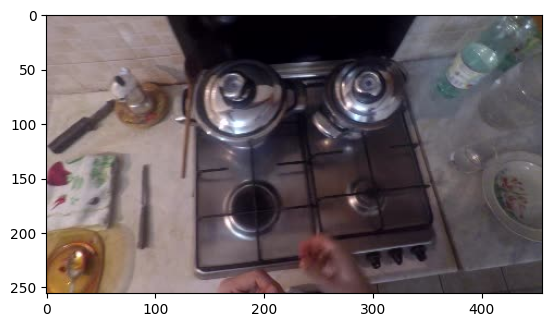

In [9]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt

img_path = f"/home/nguyennguyen/Documents/egotopo/research/P26/rgb_frames/frame_0000000007.jpg"
# sorted(os.listdir(img_path))
plt.imshow(Image.open(img_path))

In [10]:
sorted(os.listdir(img_path))

NotADirectoryError: [Errno 20] Not a directory: '/home/nguyennguyen/Documents/egotopo/research/P26/rgb_frames/frame_0000000007.jpg'

In [11]:
from ultralytics import YOLO

# Load a pretrained YOLO11n model
model = YOLO("yolo11n.pt")
# modelx = YOLO("yolo11x.pt")

In [12]:
len(graph[1])
graph[1]

[1,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 18,
 19,
 20,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 213,
 214,
 215,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 302]

In [13]:
'''
OBJECT PREDICTION WITH YOLO ON NODE 1 OF RESNET CONSTRUCTED GRAPH
'''
graph
#frame_0000033246.jpg
node1 = graph[1]

conf = [0.2]
yolo_predictions = {}

for c in conf:
    obj_predictions = {}  #{frame: {prediction: probability}}
    yolo_predictions[c] = obj_predictions #{confidence_level : {objpredictions}}

    for f in node1:
        num = str(f).rjust(10,'0')
        name = "frame_" + num + ".jpg"
        frame = os.path.join(frame_path, name)
        # print(os.path.isfile(frame))
        results = model(frame, conf=c, save=True)

        boxes = results[0].boxes.cls.tolist()
        confs = results[0].boxes.conf.tolist()
        d = dict(map(lambda i,j : (i,j), boxes, confs))
        obj_predictions[f] = d



image 1/1 /home/nguyennguyen/Documents/egotopo/research/P26/rgb_frames/frame_0000000001.jpg: 384x640 1 person, 1 bottle, 1 knife, 28.4ms
Speed: 2.6ms preprocess, 28.4ms inference, 63.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict6

image 1/1 /home/nguyennguyen/Documents/egotopo/research/P26/rgb_frames/frame_0000000005.jpg: 384x640 1 person, 1 bottle, 3.4ms
Speed: 1.9ms preprocess, 3.4ms inference, 11.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict6

image 1/1 /home/nguyennguyen/Documents/egotopo/research/P26/rgb_frames/frame_0000000006.jpg: 384x640 1 person, 1 bottle, 3.4ms
Speed: 2.5ms preprocess, 3.4ms inference, 11.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict6

image 1/1 /home/nguyennguyen/Documents/egotopo/research/P26/rgb_frames/frame_0000000007.jpg: 384x640 1 person, 1 wine glass, 3.4ms
Speed: 1.7ms preprocess, 3.4ms inference, 11.4ms postprocess per ima

In [14]:
yolo_predictions.keys()

dict_keys([0.2])

In [15]:
boxes = results[0].boxes.cls.tolist()
confs = results[0].boxes.conf.tolist()
results[0].boxes
results[0].names[int(boxes[1])]
results[0].boxes.cls.tolist()
yolo_predictions.keys()

dict_keys([0.2])

In [16]:
'''
Label version of predictions & confidence for each frame.
'''
prediction_names = {}
for f, p in obj_predictions.items():
    prediction_names[f] = {}
    for label, conf in p.items():
        name = results[0].names[int(label)]
        prediction_names[f][name] = conf

In [17]:
prediction_names

{1: {'person': 0.6622251272201538,
  'knife': 0.3774109184741974,
  'bottle': 0.2626674473285675},
 5: {'person': 0.5440443754196167, 'bottle': 0.3108798563480377},
 6: {'person': 0.4808367192745209, 'bottle': 0.30977216362953186},
 7: {'person': 0.46470338106155396, 'wine glass': 0.3443874716758728},
 8: {'person': 0.49063852429389954,
  'wine glass': 0.3239307999610901,
  'oven': 0.2041126787662506},
 9: {'person': 0.4996297061443329,
  'oven': 0.21836264431476593,
  'wine glass': 0.20690955221652985},
 10: {'person': 0.5171781182289124, 'oven': 0.2642326354980469},
 11: {'person': 0.5134751200675964, 'oven': 0.2120535969734192},
 12: {'person': 0.5499507188796997,
  'bowl': 0.23699910938739777,
  'oven': 0.21695458889007568},
 13: {'person': 0.6520442366600037,
  'oven': 0.28365880250930786,
  'bowl': 0.2575857639312744},
 14: {'person': 0.6435335874557495,
  'bowl': 0.25290337204933167,
  'oven': 0.30427318811416626,
  'wine glass': 0.22830264270305634},
 18: {'person': 0.713542878

In [18]:
print(f"results[0]={results[0]}")
# print(f"results[0].boxes={results[0].boxes}")
boxes = results[0].boxes
probs = results[0].probs


results[0]=ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'pot

In [19]:
"""
SEQUENTIAL LOGIC FILTER
""" 
import pyreason as pr
import networkx as nx

pr.settings.verbose = True     # Print info to screen
pr.settings.atom_trace = True


In [20]:
proc_graph = {}
for node in graph:
    if len(graph[node]) == 0:
        print("{} is empty".format(node))
        continue
    proc_graph[node] = {}
    for node2 in graph[node]:
        proc_graph[node][node2] = {"weight": 1}

10000 is empty


In [21]:
G = nx.from_dict_of_dicts(proc_graph)

In [22]:
proc_graph

{1: {1: {'weight': 1},
  5: {'weight': 1},
  6: {'weight': 1},
  7: {'weight': 1},
  8: {'weight': 1},
  9: {'weight': 1},
  10: {'weight': 1},
  11: {'weight': 1},
  12: {'weight': 1},
  13: {'weight': 1},
  14: {'weight': 1},
  18: {'weight': 1},
  19: {'weight': 1},
  20: {'weight': 1},
  171: {'weight': 1},
  172: {'weight': 1},
  173: {'weight': 1},
  174: {'weight': 1},
  175: {'weight': 1},
  176: {'weight': 1},
  177: {'weight': 1},
  178: {'weight': 1},
  179: {'weight': 1},
  180: {'weight': 1},
  181: {'weight': 1},
  182: {'weight': 1},
  183: {'weight': 1},
  184: {'weight': 1},
  185: {'weight': 1},
  186: {'weight': 1},
  187: {'weight': 1},
  188: {'weight': 1},
  189: {'weight': 1},
  190: {'weight': 1},
  191: {'weight': 1},
  192: {'weight': 1},
  193: {'weight': 1},
  194: {'weight': 1},
  195: {'weight': 1},
  196: {'weight': 1},
  197: {'weight': 1},
  198: {'weight': 1},
  213: {'weight': 1},
  214: {'weight': 1},
  215: {'weight': 1},
  286: {'weight': 1},
  287

In [23]:
G = nx.DiGraph()
G.add_nodes_from(proc_graph.keys())

for k, v in proc_graph.items():
    G.add_edges_from(([(k, t) for t in v]))

In [24]:
pr.load_graph(G)
G.nodes()

NodeView((1, 44, 308, 347, 361, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18, 19, 20, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 213, 214, 215, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 2

In [25]:
proc_graph[44]
G.nodes()
colors = ["mistyrose", "mistyrose","mistyrose","mistyrose","mistyrose"]
sizes = [2000, 2000, 2000, 2000, 2000]
for i in range(5,len(G.nodes)):
    colors.append("skyblue")
    sizes.append(500)
colors

['mistyrose',
 'mistyrose',
 'mistyrose',
 'mistyrose',
 'mistyrose',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyblue',
 'skyb

In [26]:
G.edges

OutEdgeView([(1, 1), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 18), (1, 19), (1, 20), (1, 171), (1, 172), (1, 173), (1, 174), (1, 175), (1, 176), (1, 177), (1, 178), (1, 179), (1, 180), (1, 181), (1, 182), (1, 183), (1, 184), (1, 185), (1, 186), (1, 187), (1, 188), (1, 189), (1, 190), (1, 191), (1, 192), (1, 193), (1, 194), (1, 195), (1, 196), (1, 197), (1, 198), (1, 213), (1, 214), (1, 215), (1, 286), (1, 287), (1, 288), (1, 289), (1, 290), (1, 291), (1, 292), (1, 293), (1, 294), (1, 295), (1, 296), (1, 297), (1, 298), (1, 299), (1, 300), (1, 301), (1, 302), (44, 44), (44, 50), (44, 51), (44, 52), (44, 53), (44, 54), (44, 55), (44, 56), (44, 57), (44, 58), (44, 59), (44, 60), (44, 61), (44, 62), (44, 63), (44, 64), (44, 65), (44, 66), (44, 67), (44, 68), (44, 69), (44, 70), (44, 71), (44, 72), (44, 73), (44, 74), (44, 75), (44, 76), (44, 77), (44, 78), (44, 79), (44, 80), (44, 81), (44, 82), (44, 83), (44, 84), (44, 85), (44, 86), (44, 87

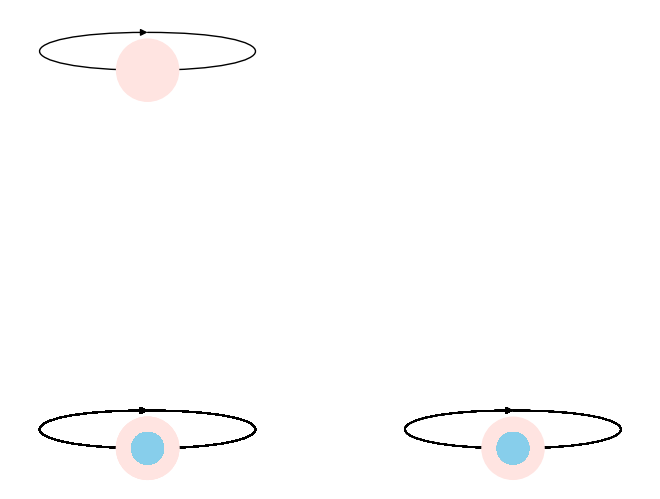

In [27]:
layout = nx.spectral_layout(G)
nx.draw(G, pos=layout, arrows=True, node_color=colors, node_size=sizes)


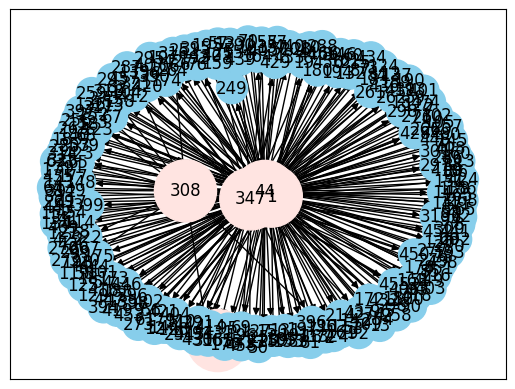

In [28]:
nx.draw_networkx(G, arrows = True, node_color=colors, node_size=sizes)

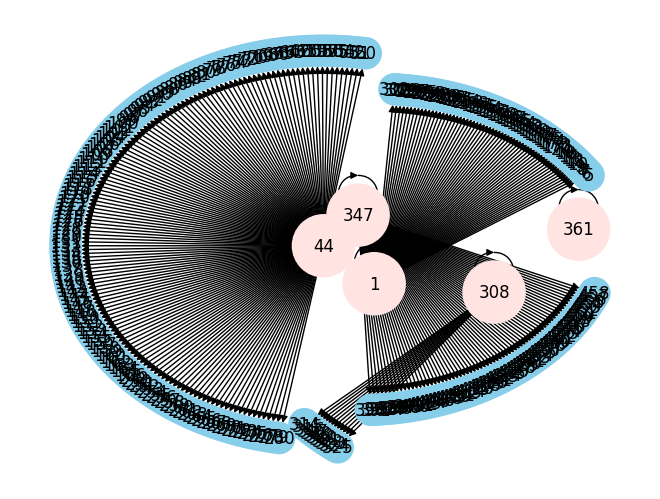

In [29]:
nx.draw_kamada_kawai(G, arrows = True, node_color=colors, node_size=sizes, with_labels=True)

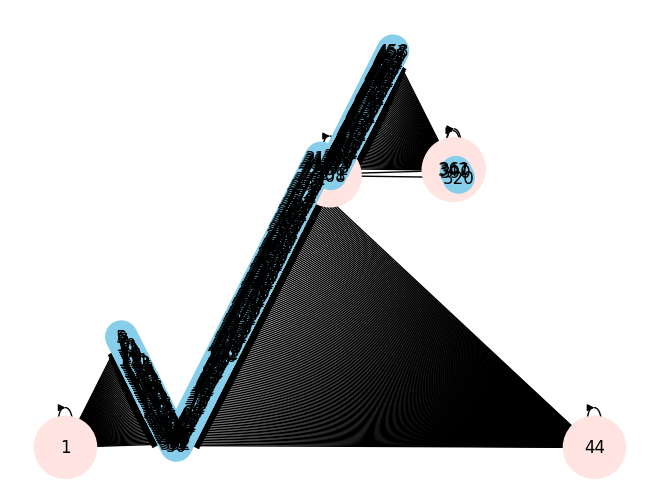

In [30]:
nx.draw_planar(G, arrows = True, node_color=colors, node_size=sizes, with_labels=True)

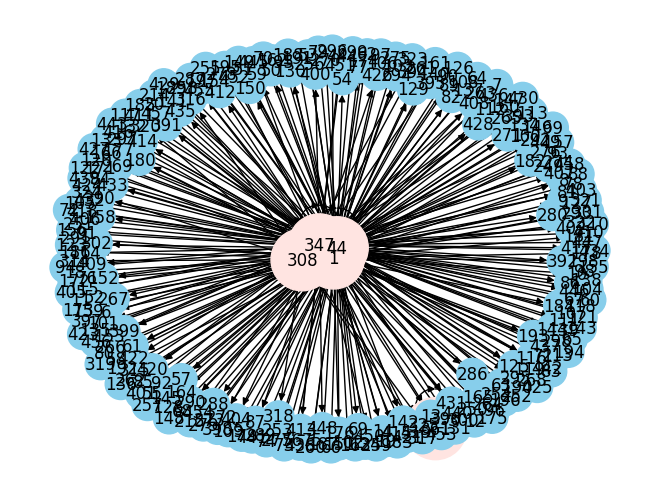

In [31]:
nx.draw_spring(G, arrows = True, node_color=colors, node_size=sizes, with_labels=True)

In [32]:
"""ESTABLISH FACTS FROM LABELED DATA"""
import pandas as pd

obj_df = pd.read_csv("/home/nguyennguyen/Documents/egotopo/epic-kitchens-55-annotations/EPIC_train_object_labels.csv")
action_df = pd.read_csv("/home/nguyennguyen/Documents/egotopo/epic-kitchens-55-annotations/EPIC_train_action_labels.csv")
corr_df = pd.read_csv("/home/nguyennguyen/Documents/egotopo/epic-kitchens-55-annotations/EPIC_test_s1_object_action_correspondence.csv")

noun_class_labels_df = pd.read_csv("/home/nguyennguyen/Documents/egotopo/epic-kitchens-55-annotations/EPIC_noun_classes.csv")


In [33]:
obj_df
action_df

,uid,participant_id,video_id,narration,start_timestamp,stop_timestamp,start_frame,stop_frame,verb,verb_class,noun,noun_class,all_nouns,all_noun_classes
0,0,P01,P01_01,open door,00:00:00.14,00:00:03.37,8,202,open,2,door,8,['door'],[8]
1,1,P01,P01_01,turn on light,00:00:04.37,00:00:06.17,262,370,turn-on,12,light,113,['light'],[113]
2,2,P01,P01_01,close door,00:00:06.98,00:00:09.49,418,569,close,3,door,8,['door'],[8]
3,3,P01,P01_01,open fridge,00:00:12.77,00:00:13.99,766,839,open,2,fridge,10,['fridge'],[10]
4,4,P01,P01_01,take celery,00:00:15.25,00:00:16.40,915,983,take,0,celery,185,['celery'],[185]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28467,39232,P31,P31_14,wash glass,00:03:53.19,00:04:17.71,13991,15462,wash,4,glass,16,['glass'],[16]
28468,39233,P31,P31_14,dry hands,00:04:51.21,00:04:58.93,17472,17935,dry,11,hand,12,['hand'],[12]
28469,39234,P31,P31_14,pick up napkins,00:04:59.53,00:05:02.24,17971,18134,pick-up,0,napkin,97,['napkin'],[97]
28470,39235,P31,P31_14,put down napkins,00:05:02.34,00:05:10.76,18140,18645,put-down,1,napkin,97,['napkin'],[97]


In [34]:
proc_graph

{1: {1: {'weight': 1},
  5: {'weight': 1},
  6: {'weight': 1},
  7: {'weight': 1},
  8: {'weight': 1},
  9: {'weight': 1},
  10: {'weight': 1},
  11: {'weight': 1},
  12: {'weight': 1},
  13: {'weight': 1},
  14: {'weight': 1},
  18: {'weight': 1},
  19: {'weight': 1},
  20: {'weight': 1},
  171: {'weight': 1},
  172: {'weight': 1},
  173: {'weight': 1},
  174: {'weight': 1},
  175: {'weight': 1},
  176: {'weight': 1},
  177: {'weight': 1},
  178: {'weight': 1},
  179: {'weight': 1},
  180: {'weight': 1},
  181: {'weight': 1},
  182: {'weight': 1},
  183: {'weight': 1},
  184: {'weight': 1},
  185: {'weight': 1},
  186: {'weight': 1},
  187: {'weight': 1},
  188: {'weight': 1},
  189: {'weight': 1},
  190: {'weight': 1},
  191: {'weight': 1},
  192: {'weight': 1},
  193: {'weight': 1},
  194: {'weight': 1},
  195: {'weight': 1},
  196: {'weight': 1},
  197: {'weight': 1},
  198: {'weight': 1},
  213: {'weight': 1},
  214: {'weight': 1},
  215: {'weight': 1},
  286: {'weight': 1},
  287

In [35]:
prediction_names.keys()

dict_keys([1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 18, 19, 20, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 213, 214, 215, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302])

In [36]:
f1 = set(prediction_names[1])
f2 = set(prediction_names[5])
f3 = set(prediction_names[6])
f4 = set(prediction_names[7])

In [37]:
f1 & f2

{'bottle', 'person'}

In [38]:
f1 - f2

{'knife'}

In [39]:
f1 - f3

{'knife'}

In [40]:
f1 - f4

{'bottle', 'knife'}

In [41]:
action_df[action_df["verb"] == "cut"]

,uid,participant_id,video_id,narration,start_timestamp,stop_timestamp,start_frame,stop_frame,verb,verb_class,noun,noun_class,all_nouns,all_noun_classes
37,37,P01,P01_01,cut courgette,00:01:45.69,00:02:02.03,6341,7321,cut,5,courgette,69,['courgette'],[69]
39,39,P01,P01_01,cut courgette,00:02:07.80,00:02:24.89,7668,8693,cut,5,courgette,69,['courgette'],[69]
40,40,P01,P01_01,still cutting courgette,00:02:10.99,00:02:25.79,7859,8747,cut,5,courgette,69,['courgette'],[69]
63,63,P01,P01_01,cut celery,00:05:22.78,00:05:28.18,19366,19690,cut,5,celery,185,['celery'],[185]
64,64,P01,P01_01,still cutting celery,00:05:28.28,00:05:38.07,19696,20284,cut,5,celery,185,['celery'],[185]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28125,38792,P31,P31_03,cut pineapple,00:01:13.06,00:01:40.44,4383,6026,cut,5,pineapple,328,['pineapple'],[328]
28177,38845,P31,P31_05,cut lemon,00:04:32.32,00:04:37.40,16339,16644,cut,5,lemon,129,['lemon'],[129]
28281,38949,P31,P31_08,cut salad,00:03:38.09,00:04:10.53,13085,15031,cut,5,salad,54,['salad'],[54]
28321,38989,P31,P31_08,cut slices of cheese,00:08:31.42,00:09:12.51,30685,33150,cut,5,cheese,51,['cheese'],"[51, 51]"


In [42]:
"""CHECK IF THE YOLO V11 AND DATA LABELS ARE COMPATIBLE"""

yolo_labels = results[0].names
yolo_labels


{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [43]:
noun_class_labels_df

,noun_id,class_key,nouns
0,0,Nothing,['Nothing']
1,1,pan,"['pan', 'pan:sauce', 'pan:frying', 'pan:cake',..."
2,2,pan:dust,"['pan:dust', 'dustpan']"
3,3,tap,"['tap', 'tap:water', 'nozzle', 'nozzle:coffee']"
4,4,plate,"['plate', 'plate:pasta', 'saucer', 'dish', 'pl..."
...,...,...,...
347,347,heart,['heart']
348,348,funnel,['funnel']
349,349,whisk,['whisk']
350,350,driver:screw,['driver:screw']


In [44]:
noun_labels = noun_class_labels_df["class_key"].to_list()
labels = set(noun_labels)
yolo = set(yolo_labels.values())

In [45]:
yolo

{'airplane',
 'apple',
 'backpack',
 'banana',
 'baseball bat',
 'baseball glove',
 'bear',
 'bed',
 'bench',
 'bicycle',
 'bird',
 'boat',
 'book',
 'bottle',
 'bowl',
 'broccoli',
 'bus',
 'cake',
 'car',
 'carrot',
 'cat',
 'cell phone',
 'chair',
 'clock',
 'couch',
 'cow',
 'cup',
 'dining table',
 'dog',
 'donut',
 'elephant',
 'fire hydrant',
 'fork',
 'frisbee',
 'giraffe',
 'hair drier',
 'handbag',
 'horse',
 'hot dog',
 'keyboard',
 'kite',
 'knife',
 'laptop',
 'microwave',
 'motorcycle',
 'mouse',
 'orange',
 'oven',
 'parking meter',
 'person',
 'pizza',
 'potted plant',
 'refrigerator',
 'remote',
 'sandwich',
 'scissors',
 'sheep',
 'sink',
 'skateboard',
 'skis',
 'snowboard',
 'spoon',
 'sports ball',
 'stop sign',
 'suitcase',
 'surfboard',
 'teddy bear',
 'tennis racket',
 'tie',
 'toaster',
 'toilet',
 'toothbrush',
 'traffic light',
 'train',
 'truck',
 'tv',
 'umbrella',
 'vase',
 'wine glass',
 'zebra'}

In [46]:
print(f"dataset noun labels={len(labels)} and yolo labels={len(yolo)}")
yil = yolo.intersection(labels)

print(f"yolo intersection labels={len(yil)}")
yil

dataset noun labels=352 and yolo labels=80
yolo intersection labels=22


{'apple',
 'backpack',
 'banana',
 'book',
 'bottle',
 'bowl',
 'broccoli',
 'cake',
 'carrot',
 'chair',
 'cup',
 'fork',
 'knife',
 'microwave',
 'mouse',
 'oven',
 'pizza',
 'sandwich',
 'scissors',
 'sink',
 'spoon',
 'toaster'}

In [47]:
noun_class_labels_df["nouns"].to_list()


["['Nothing']",
 "['pan', 'pan:sauce', 'pan:frying', 'pan:cake', 'saucepan', 'saucepan:empty', 'saucepan:small', 'wok', 'wok:scour', 'pan:content']",
 "['pan:dust', 'dustpan']",
 "['tap', 'tap:water', 'nozzle', 'nozzle:coffee']",
 "['plate', 'plate:pasta', 'saucer', 'dish', 'plate:salad', 'plate:lasagna', 'food:plate', 'flatware', 'pate']",
 "['knife', 'knife:mincing', 'knife:using', 'blade', 'chopper', 'knife:mezzaluna', 'chopper:moon', 'mezzaluna']",
 "['bowl', 'bowl:salad', 'bowl:glass', 'bowl:sugar', 'bowl:empty', 'bowl:cooker', 'bowl:washing', 'bowl:egg', 'bowl:processor']",
 "['spoon', 'spoon:wooden', 'spoon:using', 'teaspoon', 'risotto:spoon', 'spade', 'spade:food', 'spoon:coffee', 'spoon:tea', 'measure', 'stirrer:coffee', 'scoop', 'stirrer', 'tablespoon']",
 "['cupboard', 'cabinet', 'locker', 'flap', 'door', 'door:cabinet', 'door:cupboard', 'closet']",
 "['drawer', 'drawer:dishwasher', 'drawer:freezer', 'drawer:refrigerator', 'draw']",
 "['fridge', 'refrigerator', 'door:refrige

In [48]:
"""Check Yolo Classify using Imagenet which has 998 labels.
Yolo v11 object detection uses COCO to train which only has 80 classes"""

file = open("/home/nguyennguyen/Documents/egotopo/imagenet_classes.txt", "r")
imagenet = file.read()
imagenet = set(imagenet.split("\n"))

imgnet_intsec_labels = imagenet.intersection(labels)
len(imgnet_intsec_labels)

32

In [61]:
len(imagenet)

998

In [49]:
# for every label in my dataset, check if its in the synonym of the imagenet label and see how many intersection
"""
For each noun class labels, see if its synonym is in ImageNet labels.
"""

import nltk
from nltk.corpus import wordnet
nltk.download('wordnet')
#get all synonyms of noun_labels, 
synonyms = []
for noun in labels:
    for synset in wordnet.synsets(noun):
        # print(syn)
        for lemma in synset.lemma_names():
            # print(lemma)
            if lemma in imagenet and lemma != noun:
                synonyms.append(lemma)
        

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/nguyennguyen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [59]:
imgnet_intsec = list(imgnet_intsec_labels) + synonyms
print(f"unique intersection={len(set(imgnet_intsec))}") #vs intersection={len(imgnet_intsec)}")


unique intersection=55, vs intersection=70


In [51]:
labels - set(imgnet_intsec)

{'Nothing',
 'air',
 'alarm',
 'alcohol',
 'almond',
 'apple',
 'asparagus',
 'aubergine',
 'avocado',
 'bacon',
 'bag',
 'ball',
 'bar:cereal',
 'base',
 'basil',
 'basket',
 'bean:green',
 'beef',
 'beer',
 'berry',
 'bin',
 'biscuit',
 'blender',
 'blueberry',
 'board:chopping',
 'boiler',
 'book',
 'bottle',
 'bowl',
 'box',
 'bread',
 'breadcrumb',
 'brush',
 'burger:tuna',
 'butter',
 'butter:peanut',
 'button',
 'cabbage',
 'cake',
 'can',
 'cap',
 'caper',
 'capsule',
 'carrot',
 'casserole',
 'cd',
 'celery',
 'cereal',
 'chair',
 'cheese',
 'cherry',
 'chicken',
 'chilli',
 'chip',
 'chocolate',
 'chopstick',
 'cinnamon',
 'clip',
 'cloth',
 'clothes',
 'coconut',
 'coffee',
 'coke',
 'colander',
 'container',
 'content',
 'control:remote',
 'cooker:slow',
 'coriander',
 'cork',
 'courgette',
 'cover',
 'cream',
 'crisp',
 'croissant',
 'cumin',
 'cupboard',
 'curry',
 'cutlery',
 'cutter:pizza',
 'dish:soap',
 'door:kitchen',
 'drawer',
 'dressing:salad',
 'drink',
 'driver:

In [52]:
for synset in wordnet.synsets("blender"):
    for lemma in synset.lemma_names():
        print(lemma)

blender
liquidizer
liquidiser


In [53]:
"""Is there any dataset with all the object detection labels that I need. -> to train a model for object detection with all the labels that I want
With yolo, detect whether there's an object or not. Train a model on detection
"""

"""LVIS"""
import yaml

with open("/home/nguyennguyen/Documents/egotopo/ego-topo/object_detection/yolov11/lvis.yaml", 'r') as f:
    data = yaml.load(f, Loader=yaml.SafeLoader)
lvis_dict = data.get('names')
lvis = lvis_dict.values()
lvis = set(lvis)
lvis

lvis_intersect = lvis.intersection(labels)
len(lvis_intersect)

"""
for each synonym of each EPIC noun, if it's in lvis and not EPIC, add to synonyms
"""

import nltk
from nltk.corpus import wordnet
nltk.download('wordnet')
#get all synonyms of noun_labels, 
lvis_synonyms = []
for noun in labels:
    for synset in wordnet.synsets(noun):
        # print(syn)
        for lemma in synset.lemma_names():
            # 
            if lemma in lvis and lemma != noun:
                lvis_synonyms.append(lemma)

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/nguyennguyen/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [68]:
len(lvis)

1203

In [66]:
lvis_match = set(list(lvis_intersect)+list(lvis_synonyms))
print(f"total matches={len(lvis_match)} lvis_intersect={len(lvis_intersect)} and lvis_synonyms={len(lvis_synonyms)}")

total matches=128 lvis_intersect=88 and lvis_synonyms=73


In [55]:
check = lvis_intersect.intersection(set(lvis_synonyms))
len(check)
print(f"Words in lvis_syn but not in intersection{set(lvis_synonyms) - lvis_intersect}")
print(f"Total labels intersection between EPIC KITCHEN & LVIS is roughly={lvis_intersect}")

Words in lvis_syn but not in intersection{'flowerpot', 'wheel', 'raft', 'cloak', 'prune', 'dish', 'stool', 'wolf', 'globe', 'blimp', 'spotlight', 'coil', 'sail', 'barge', 'dagger', 'Bible', 'nut', 'tag', 'robe', 'packet', 'toilet', 'pad', 'bear', 'card', 'brownie', 'hook', 'coin', 'magazine', 'ring', 'pillow', 'blanket', 'flap', 'coat', 'applesauce', 'apricot', 'crown', 'dog', 'jacket', 'diaper', 'pitchfork'}
Total labels intersection between EPIC KITCHEN & LVIS is roughly={'lemon', 'peach', 'muffin', 'cup', 'pancake', 'onion', 'apple', 'toaster', 'blueberry', 'lettuce', 'scissors', 'smoothie', 'towel', 'hat', 'drawer', 'oven', 'ball', 'celery', 'bread', 'apron', 'chopstick', 'box', 'potato', 'avocado', 'carrot', 'cake', 'masher', 'pizza', 'fork', 'shirt', 'butter', 'spoon', 'tablecloth', 'mushroom', 'tomato', 'tray', 'ladle', 'button', 'grater', 'tongs', 'waffle', 'table', 'grape', 'bottle', 'melon', 'broccoli', 'cover', 'almond', 'soap', 'lime', 'artichoke', 'lamp', 'vinegar', 'sock'

In [56]:
lvis_intersect

{'almond',
 'apple',
 'apron',
 'artichoke',
 'asparagus',
 'avocado',
 'ball',
 'banana',
 'blueberry',
 'book',
 'bottle',
 'bowl',
 'box',
 'bread',
 'broccoli',
 'butter',
 'button',
 'cake',
 'carrot',
 'casserole',
 'celery',
 'chair',
 'cherry',
 'chopstick',
 'clip',
 'cover',
 'cup',
 'desk',
 'drawer',
 'envelope',
 'fish',
 'fork',
 'funnel',
 'grape',
 'grater',
 'hat',
 'heart',
 'honey',
 'jar',
 'knife',
 'knob',
 'ladder',
 'ladle',
 'lamp',
 'lemon',
 'lettuce',
 'lime',
 'masher',
 'melon',
 'milk',
 'muffin',
 'mushroom',
 'onion',
 'oven',
 'pancake',
 'peach',
 'pear',
 'pie',
 'pineapple',
 'pizza',
 'plate',
 'pot',
 'potato',
 'salad',
 'salami',
 'sandwich',
 'sausage',
 'scissors',
 'shirt',
 'sink',
 'smoothie',
 'soap',
 'sock',
 'soup',
 'spatula',
 'sponge',
 'spoon',
 'strainer',
 'table',
 'tablecloth',
 'toaster',
 'tomato',
 'tongs',
 'tortilla',
 'towel',
 'tray',
 'vinegar',
 'waffle'}

In [57]:
"""Turning Data Labels and attribute into matrix"""

#Create matrix



'Turning Data Labels and attribute into matrix'